In [1]:
import pandas as pd
import numpy as np
import module_import
from src.quant_analysis.module_import import ETF_0050
df = ETF_0050()

[2024-09-02 11:08:03,655][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='0050' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='0050' ORDER BY Date DESC LIMIT 500;

[2024-09-02 11:08:03,712][log.log][INFO] Query execution time: 0.019016504287719727 seconds.


<Axes: xlabel='Date'>

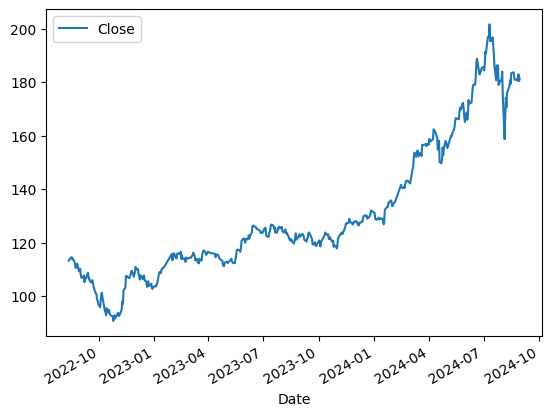

In [2]:
df.plot()

In [4]:
PMT=3000
start = "2023-01-01"
end = "2024-03-01"

take_profit = 100
dfm = df.resample("BME").last()
dfm = df.loc[start:end]

In [7]:
total_cost_line=[PMT]
unit_list = [PMT / dfm["Close"].iloc[0]]
pre_NAV_list = [0]
TR_check_list = [0]
accum_profit = 0
accum_cost = 0
accum_profit_list = [0]
accum_cost_list = [0]
TR_list = [0]

for i, price in enumerate(dfm['Close'].iloc[1:]):
    total_cost = total_cost_line[i] + PMT
    unit = unit_list[i] + (PMT / price)
    pre_NAV = unit_list[i]*price
    TR_check = pre_NAV / total_cost_line[i]-1
    TR = (pre_NAV + accum_profit_list[i]) / (total_cost_line[i] + accum_cost_list[i]) - 1
    
    if TR_check > take_profit:
        accum_profit += pre_NAV
        accum_cost += (total_cost - PMT)
        total_cost = PMT
        unit = total_cost / price

    total_cost_line.append(total_cost)
    unit_list.append(unit)
    pre_NAV_list.append(pre_NAV)
    TR_check_list.append(TR_check)
    TR_list.append(TR)
    accum_profit_list.append(accum_profit)
    accum_cost_list.append(accum_cost)

dfm['total_cost'] = total_cost_line
dfm['unit'] = unit_list
dfm['preNAV'] = pre_NAV_list
dfm['TR_check'] = TR_check_list
dfm['accum_profit'] = accum_profit_list
dfm['accum_cost'] = accum_cost_list
dfm['TR'] = TR_list

dfm

/tmp/ipykernel_12933/3870724526.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['total_cost'] = total_cost_line
/tmp/ipykernel_12933/3870724526.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['unit'] = unit_list
/tmp/ipykernel_12933/3870724526.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,Close,total_cost,unit,preNAV,TR_check,accum_profit,accum_cost,TR
Date,,,,,,,,
2023-01-03,103.790,3000,28.904519,0.000000,0.000000,0,0,0.000000
2023-01-04,103.555,6000,57.874631,2993.207438,-0.002264,0,0,-0.002264
2023-01-05,104.305,9000,86.636436,6036.613412,0.006102,0,0,0.006102
2023-01-06,104.774,12000,115.269493,9077.245900,0.008583,0,0,0.008583
2023-01-09,108.522,15000,142.913658,12509.275961,0.042440,0,0,0.042440
...,...,...,...,...,...,...,...,...
2024-02-23,143.019,813000,6704.603386,955885.671659,0.180106,0,0,0.180106
2024-02-26,143.218,816000,6725.550474,960219.887733,0.181082,0,0,0.181082
2024-02-27,142.621,819000,6746.585244,959204.734100,0.175496,0,0,0.175496


<Axes: xlabel='Date'>

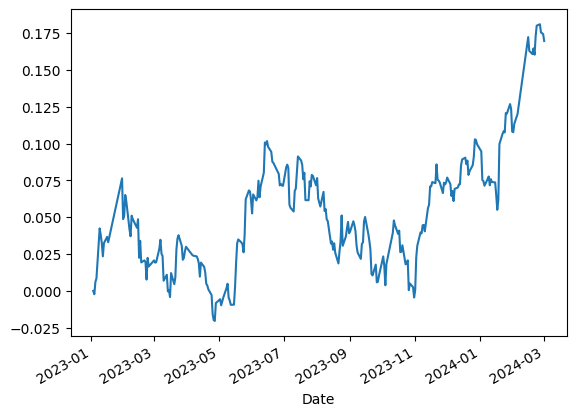

In [9]:
dfm['TR'].plot()

In [10]:
print('TR: ',dfm['TR'].iloc[-1]*100)
print('AR: ',((1+dfm['TR'].iloc[-1])**(12/len(dfm))-1)*100)

TR:  16.97127664530591
AR:  0.6863807375869113
